# K-Nearest Neighbour Algorithm to Classify the Iris Data Set
_Writing  a program to implement k-Nearest Neighbour algorithm to classify the iris data set and printing both correct and wrong predictions._

In [1]:
# Imports required packages

import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data Set
_This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 array. The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width._

In [2]:
iris = load_iris()

In [3]:
# Checks the keys associated with dataset object
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
# Checks for the features and their location in the array
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# Checks the shape of the data
print(iris.data.shape)

(150, 4)


In [6]:
# Prints iris atributes for few of the observations
print(iris.data[:10,])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [7]:
# Prints all the target (iris label) as there are only 150 observations
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
# Prints the target classes
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


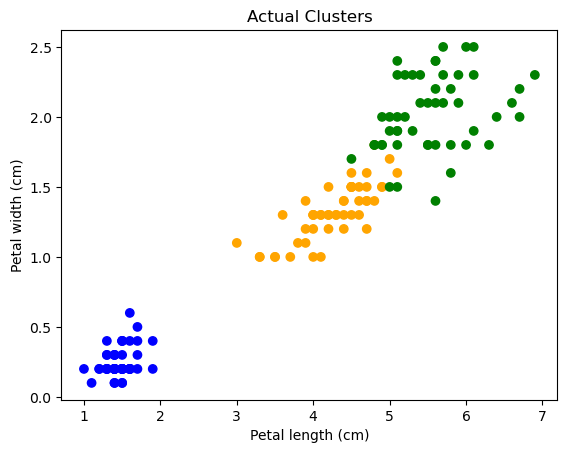

In [9]:
# Displays the irises bases on petal length and petal width  - the two major featues

colormap = np.array(['blue', 'orange', 'green'])

plt.scatter(iris.data[:,2], iris.data[:,3], c = colormap[iris.target])
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Actual Clusters")
plt.show()

## Data Transformation

In [10]:
# Splits the data set into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size = 0.3,
    random_state=42, stratify=iris.target)

In [11]:
# Ensures class distribtion is same in both train and test data set

print("Class distribution in train data set:", np.unique(y_train, return_counts=True))
print("Class distribution in test data set:", np.unique(y_test, return_counts=True))

Class distribution in train data set: (array([0, 1, 2]), array([35, 35, 35]))
Class distribution in test data set: (array([0, 1, 2]), array([15, 15, 15]))


In [12]:
# Scales the train data set

# Instatiate standard scaler object
std_scaler = StandardScaler()

# First fits the scaler and then the scaler transforms the train data set
X_train_scaled = std_scaler.fit_transform(X_train)  # First 

In [13]:
# Then, scales the test data set
X_test_scaled = std_scaler.transform(X_test)

## Modeling

In [14]:
# Initializes K-Nearest Neighbour classifier with default hyperparameters
knn_clf = KNeighborsClassifier()

# Fits the model
knn_clf.fit(X_train, y_train)

# Performs predictions
predictions = knn_clf.predict(X_test)

# Retrieves prediction probability distributions
prediction_probas = knn_clf.predict_proba(X_test)

## Analyzing Model Performance

**Showing Correct & Incorrect Predictions**

In [15]:
# Prepares a DataFrame containing all required columns to analyze correct and incorrect predictions

test_data_with_predictions = pd.DataFrame(X_test)
test_data_with_predictions.columns = iris.feature_names
test_data_with_predictions["actual class"] = y_test
test_data_with_predictions["predicted class"] = predictions
test_data_with_predictions["Predicted Probabilities"] = [str(proba) for proba in prediction_probas]

# Displays correct and incorrect predictions with relevant details
display(test_data_with_predictions)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),actual class,predicted class,Predicted Probabilities
0,7.3,2.9,6.3,1.8,2,2,[0. 0. 1.]
1,6.1,2.9,4.7,1.4,1,1,[0. 0.8 0.2]
2,6.3,2.8,5.1,1.5,2,2,[0. 0.4 0.6]
3,6.3,3.3,4.7,1.6,1,1,[0. 0.8 0.2]
4,6.1,3.0,4.9,1.8,2,2,[0. 0.4 0.6]
5,6.7,3.1,5.6,2.4,2,2,[0. 0. 1.]
6,5.5,2.3,4.0,1.3,1,1,[0. 1. 0.]
7,5.6,2.5,3.9,1.1,1,1,[0. 1. 0.]
8,5.4,3.4,1.7,0.2,0,0,[1. 0. 0.]
9,6.9,3.1,5.1,2.3,2,2,[0. 0. 1.]


**Confusion Matrix**

In [16]:
# Prints the accuracy score
print("Accuracy score on test data set: {:.3f}".format(accuracy_score(y_test, predictions)))

Accuracy score on test data set: 0.978


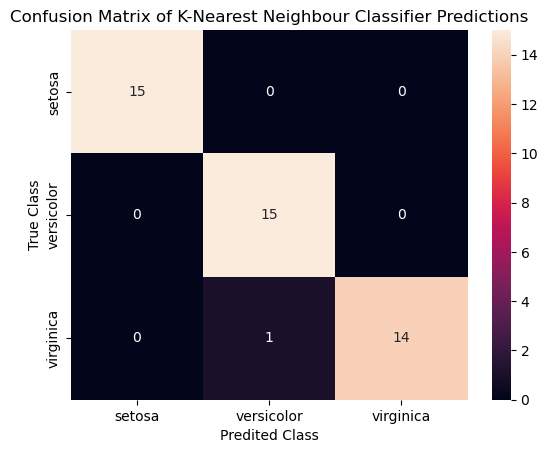

In [17]:
# Calculates Confusion Matrix and draws a heatmap out of that
conf_matrix = confusion_matrix(y_test, predictions, labels=[0, 1, 2])

sns.heatmap(
    conf_matrix, 
    annot=True, 
    xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.ylabel("True Class")
plt.xlabel("Predited Class")
plt.title("Confusion Matrix of K-Nearest Neighbour Classifier Predictions")
plt.show()

**Classification Report**

In [18]:
# Prints the classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



**Area under Receiver Operating Characteristics (ROC) Curve**

In [21]:
# Calculates the area under curve
auc_score = roc_auc_score(
    y_test, 
    prediction_probas, 
    multi_class="ovr",
    labels=[0, 1, 2]   # optional
)

print("Area under ROC Curve: {:.3f}".format(auc_score))

Area under ROC Curve: 0.997
